# Computer Vision: Algorithms and Applications
(Fall 2019)
Problem Set 0

This homework is intended to test your knowledge about the major prerequisites for the class. For some
problems, you may need to use Google and/or Wikipedia to brush up on topics with which you‟re unfamiliar.
You are also encouraged to review the Linear Algebra and Matlab tutorials.

# 1 Image Manipulation

Remember, you can use the MATLAB “doc” function to learn how to use a command (e.g. “doc rgb2gray”).
Also, the problems below can be easily solved without writing a single „for‟ loop, if you use matrix math in
your MATLAB code (a.k.a. “vectorization”).

(a) The provided imageManip.m script reads in the provided u2dark.png photo and converts it to grayscale
using rgb2gray. Use the script and your own code to calculate the following statistics: What is the average
pixel value of the resulting grayscale image? What are the min and max values? (There are several ways to
calculate these quantities in MATLAB. Review the MATLAB tutorial if you need help.)

Average pixel:  76.96217478704789
the min value:  25
the max value:  153


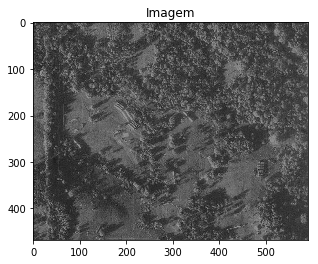

In [110]:
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
import cv2

imagePath = "https://github.com/gerivansantos/computer-vision/blob/master/imagens/u2dark.png?raw=true"

with urllib.request.urlopen(imagePath) as url:
    image = np.asarray(bytearray(url.read()), dtype="uint8")    
    image = cv2.cvtColor(cv2.imdecode(image, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
print("Average pixel: ", np.average(image))
print("the min value: ", np.min(image)) 
print("the max value: ", np.max(image))

plt.imshow(image, cmap="gray")
plt.title("Imagem")
plt.show()

(b) We would like to bring the image to a more typical average brightness. Add an offset and apply a
scaling factor to all pixels, so that the minimum pixel value becomes 0 and the max pixel value becomes
255.(Cameras often do a similar function automatically.) Include the final image in your report, as well as
the MATLAB code you used to produce it.


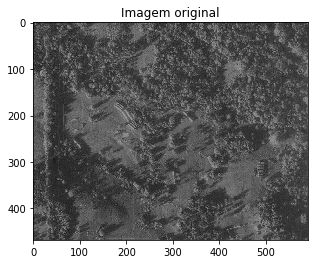

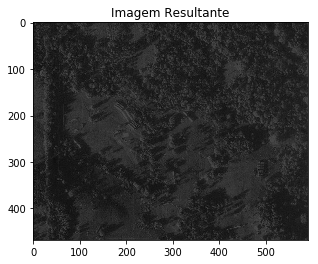

In [103]:
# O coeficiente multiplicador permite você clarear ou escurecer a imagem, valores acima de 
# 1 realiza o clareamento da imagem e valores menores que 1 escurece a imagem
fatorMultiplicador = 0.5

#Converto a imagem para um array 
matrizOriginal = np.array(image); 
matriz = np.array(gray); 

#Pego a quantidade de linhas e de colunas
qtd_linhas = len(matriz)
qtd_colunas = len(matriz[0])

# FOR aninhado para percorrer a matriz
for l in range(qtd_linhas):
    for c in range(qtd_colunas):
        #Para clarear a imagem multiplico o valor de intensidade do pixel por um numero maior que 1 
        #para que possa aumentar a intensidade do pixel e consequentemente clarear a imagem 
        #Para escurecer a imagem multiplico o valor de intensidade do pixel por um numero menor que 1 e maior que 0 
        #para que possa diminuir a intensidade do pixel e consequentemente escurecer a imagem 

        if fatorMultiplicador > 1:
            #Clarea
            if matriz[l][c] == 0:  
                matriz[l][c] = 1 * fatorMultiplicador  

            if (matriz[l][c] * fatorMultiplicador) < 255:
                matriz[l][c] = matriz[l][c] * fatorMultiplicador
            else:
                    matriz[l][c] = 255

        if fatorMultiplicador < 1 and fatorMultiplicador > 0:
            #Escurece                  
            matriz[l][c] = matriz[l][c] * fatorMultiplicador

#Converto o array para imagem 
img = Image.fromarray(matriz)
imgOriginal = Image.fromarray(matrizOriginal)

plt.imshow(imgOriginal, cmap="gray")
plt.title("Imagem original")
plt.show()

plt.imshow(img, cmap="gray")
plt.title("Imagem Resultante")
plt.show()

(c) Next, we would like to double the contrast of the pixels in the middle brightness range. Specifically, take
your result from part (b) and replace each pixel‟s intensity i with a new intensity i j , where

i' = 2(i-128) + 128

Threshold i j so that 0 ≤ i j 2 ≤ 55 (you can use the uint8 function). Include your MATLAB code and the
resulting contrast-boosted image in your report. Compare the image to part (b). What was the downside of
increasing contrast in this way, and why did it happen?

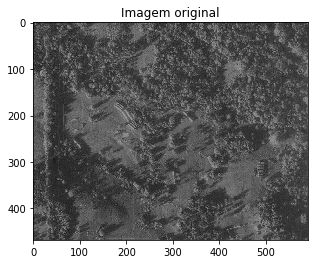

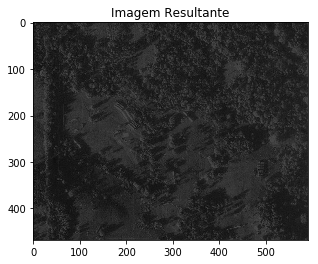

In [104]:
#Converto a imagem para um array 
matriz = np.array(gray); 
matrizOriginal = np.array(image); 

#Pego a quantidade de linhas e de colunas
qtd_linhas = len(matriz)
qtd_colunas = len(matriz[0])

# FOR aninhado para percorrer a matriz
for l in range(qtd_linhas):
    for c in range(qtd_colunas):

        if (2 * (matriz[l][c] - 128) + 128) >= 255:
            matriz[l][c] = 255
        elif (2 * (matriz[l][c] - 128) + 128) <= 0:
            matriz[l][c] = 0
        else:
            matriz[l][c] = 2 * (matriz[l][c] - 128) + 128  
            
plt.imshow(imgOriginal, cmap="gray")
plt.title("Imagem original")
plt.show()

plt.imshow(img, cmap="gray")
plt.title("Imagem Resultante")
plt.show()

# 2 Edge Detection

An “edge” is a place where image intensity changes abruptly. Edges can indicate the borders of objects.

(a) The intensity changes associated with vertical edges can be detected by calculating:
                horizontal gradient at a pixel ≈ (the pixel) - (pixel on its left)
        
for every pixel in the image. Open edgedetector.m and edit the DetectVerticalEdges() function to
do this. Run the edgedetector() function to display your calculated gradients as an image. Compare the
original image to the image of gradients. Verify that the vertical edges were detected and are visible as
1very bright or very dark areas in the gradient image. However, the gradient image also shows some tiny
bright/dark spots that indicate “edges” in the water. What caused these tiny “edges?” Include your expla-
nation and your gradient image in your report.

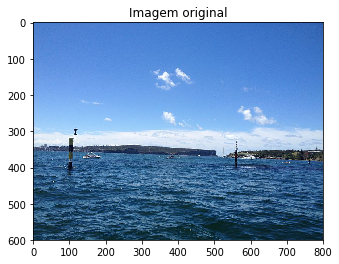

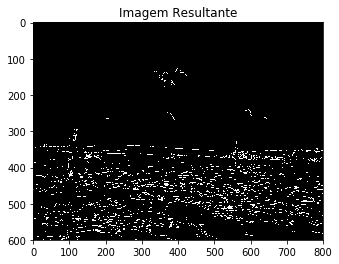

In [105]:
imagePath = "https://github.com/gerivansantos/computer-vision/blob/master/imagens/buoys.jpg?raw=true"

with urllib.request.urlopen(imagePath) as url:
    image = np.asarray(bytearray(url.read()), dtype="uint8")    
    image = cv2.cvtColor(cv2.imdecode(image, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, (121,121))
edgeDetect = cv2.Canny(opening, 200, 300)

#Converto o array para imagem 
img = Image.fromarray(edgeDetect)
imgOriginal = Image.fromarray(image)

plt.imshow(imgOriginal, cmap="gray")
plt.title("Imagem original")
plt.show()

plt.imshow(img, cmap="gray")
plt.title("Imagem Resultante")
plt.show()

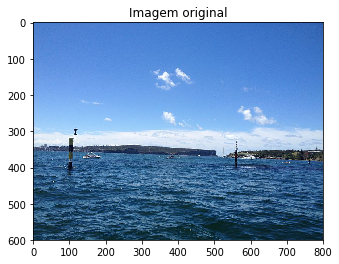

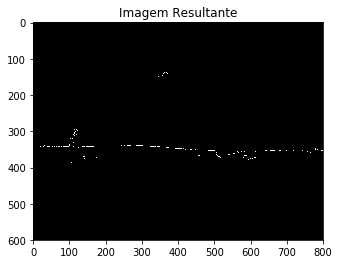

In [106]:
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, (121,121))
blur = cv2.GaussianBlur(opening,(5,5), 4)
edgeDetect = cv2.Canny(blur, 200, 300)

#Converto o array para imagem 
img = Image.fromarray(edgeDetect)
imgOriginal = Image.fromarray(image)

plt.imshow(imgOriginal, cmap="gray")
plt.title("Imagem original")
plt.show()

plt.imshow(img, cmap="gray")
plt.title("Imagem Resultante")
plt.show()

# 3 Transformation Matrices

Note: In Problem 3 above, you had to handle the fact that MATLAB images don‟t use Cartesian coordinates.
You don‟t need to think about that detail for this problem; just use standard Cartesian coordinates.

(a) Recall that transformation matrices can be used to rotate, scale, and/or skew vectors. For example,
the rotation matrix

will rotate a vector 45 degrees counterclockwise (CCW). Points may be thought of as vectors from the origin,
so we could equivalently say that it will rotate a point by 45 degrees CCW about the origin. For a vector

y 0

please describe (in words) the effect of the transformation

X 1 = AAX 0

In other words, how does X 1 relate to X 0 ? Hint: when considering a series of matrix transformations, it is
best to think of them as being applied one after the other, moving from right to left.

In [123]:
imagePath = "https://github.com/gerivansantos/computer-vision/blob/master/imagens/gulfstream.png?raw=true"

with urllib.request.urlopen(imagePath) as url:
    image = np.asarray(bytearray(url.read()), dtype="uint8")    
    image = cv2.cvtColor(cv2.imdecode(image, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
(h, w) = image.shape[:2]
(cX, cY) = (w//2, h//2)

print(w, h)
print(cX, cY)

794 423
397 211


(b)Continue to use X 0 and A as defined above. Design a series of matrix multiplications which will fitrst scale
a vector X 0 by 1.0 in the x direction and 0.5 in the y direction, and then rotate the result by 45 degrees
counterclockwise, to produce a vector which we will call X 2 . Give a formula for X 2 in terms of X 0 , the
matrix A from above, and any other necessary matrices which you define.

In [124]:
transformationMatrix = cv2.getRotationMatrix2D((cX, cY), -45, 1.0)

cos = np.abs(transformationMatrix[0,0])
sin = np.abs(transformationMatrix[0,1])

nW = int((h * sin) + (w * cos))
nH = int((h * cos) + (w * sin))

transformationMatrix[0,2] += (nW/2) - cX
transformationMatrix[1,2] += (nH/2) - cY

print("Matriz:\n", transformationMatrix[::,:2])


Matriz:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


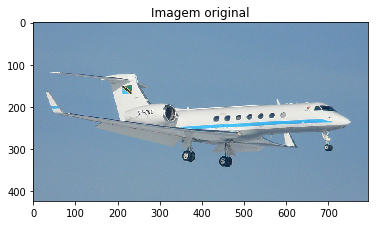

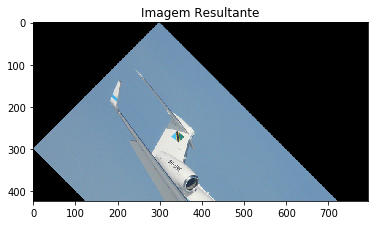

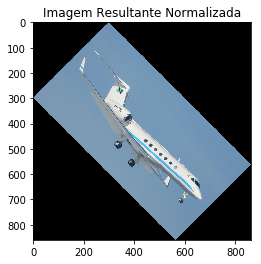

In [127]:
rotate = cv2.warpAffine(image, transformationMatrix, (w, h))
rotate2 = cv2.warpAffine(image, transformationMatrix, (nW, nH))

plt.imshow(image, cmap="gray")
plt.title("Imagem original")
plt.show()

plt.imshow(rotate, cmap="gray")
plt.title("Imagem Resultante")
plt.show()

plt.imshow(rotate2, cmap="gray")
plt.title("Imagem Resultante Normalizada")
plt.show()

# 4 SVD for Image Compression

Singular Value Decomposition (SVD) can be effectively used to compress images. Suppose I is the pixel
intensity matrix of a large image n × n. The transmission (or storage) of I requires O(n 2 ) numbers. Instead,
one could use I k , that is, the top k singular values σ 1 , σ 2 , . . . , σ k along with the left and right singular vectors
u 1 , u 2 , . . . , u k and v 1 , v 2 , . . . , v k . This would require using O(kn) real numbers instead of O(n 2 ) real numbers.
If k is much smaller than n, this results in substantial savings.
In this problem, you will explore SVD compression on the flower.bmp image we have provided. In addition
to your answers to each question, you should also submit your Matlab code and required plots where neces-
sary. Hint : You may find the Matlab svd command particularly useful for this problem.

(a) Use MATLAB to read in flower.bmp and convert it to grayscale and „double‟ format. Apply SVD
and give the top 10 singular values. Generate a plot for all singular values versus their rankings (the diag
command may be helpful to format the values). What do you notice from this plot?

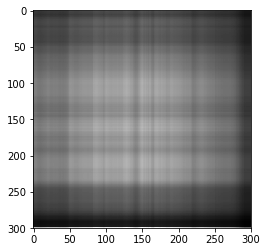

In [132]:
imagePath = "https://raw.githubusercontent.com/gerivansantos/computer-vision/master/imagens/flower.bmp?raw=true"

with urllib.request.urlopen(imagePath) as url:
    image = np.asarray(bytearray(url.read()), dtype="uint8")    
    image = cv2.cvtColor(cv2.imdecode(image, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
U, sigma, V = np.linalg.svd(gray)



reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstimg, cmap='gray');


    
#plt.imshow(image, cmap="gray")
#plt.title("Imagem original")
plt.show()